In [2]:
import pyWidar2 as pw
import numpy as np

# Load raw CSI

sample npy load start... Wed Mar 20 19:48:45 2024
loaded
scaled
Removing sm...Done
sample (103693, 30, 3, 3) load complete Wed Mar 20 19:49:18 2024
sample apply dynamic component extraction: overall-divide versus tx1...Done
sample apply dynamic component extraction: highpass versus rx0...Done
sample apply dynamic component extraction: savgol versus rx0...Done
total steps= 1036
step1035 / loop99
Total time: 137.74436283111572


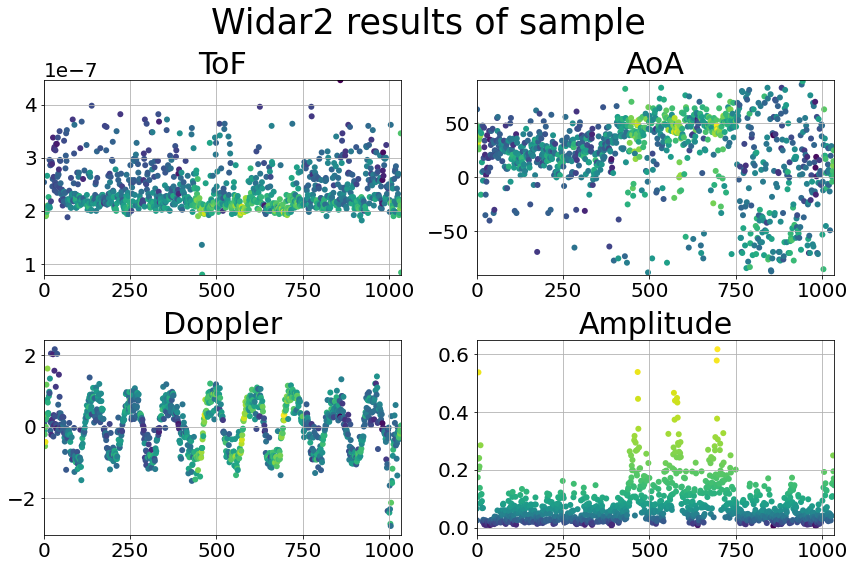

In [3]:
%matplotlib inline
conf = pw.MyConfigsW2(5.32, 20, num_paths=1)
conf.ntx = 3
conf.tx_rate = 0x1c113
csi = pw.MyCsiW2(conf, 'sample', '../npsave/0307/0307A04-csio.npy')
csi.load_data(remove_sm=True)
csi.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1, subtract_mean=False)
csi.extract_dynamic(mode='highpass', cutoff=2)
csi.extract_dynamic(mode='savgol')
widar = pw.MyWidar2(conf, csi)
widar.run(pick_tx=0, dynamic_durations=False)
widar.plot_results()

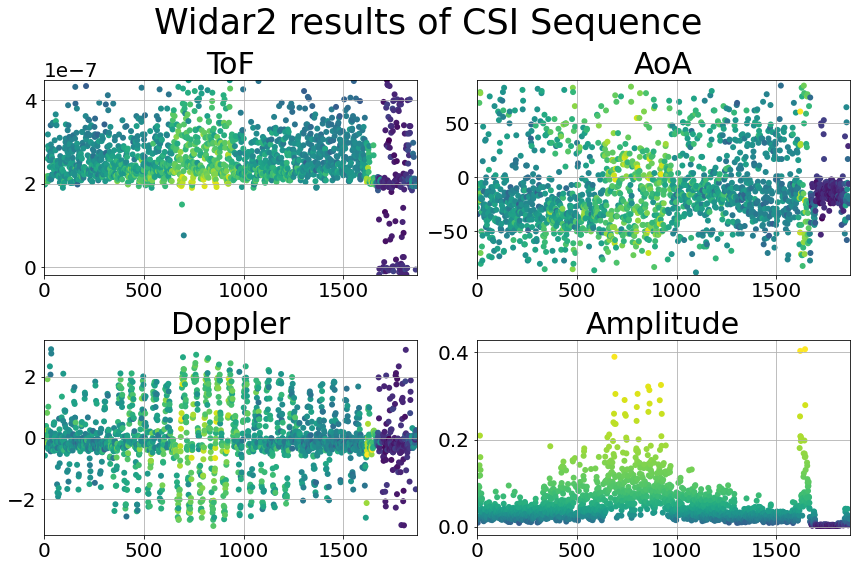

In [5]:
widar.csi.name = 'CSI Sequence'
widar.plot_results()

# Load preprocessed CSI dataset

In [ ]:
%matplotlib inline
csis = np.load('../dataset/0509/make06-finished/csi.npy', mmap_mode='r')
conf = pw.MyConfigsW2(5.32, 20, num_paths=1)
conf.ntx = 3
conf.tx_rate = 0x1c113
for i in range(10):
    _csi = np.squeeze(csis[i])
    _csi = _csi[0] * np.exp(_csi[1] * 1.j)
    _csi = _csi.T.reshape(100, 30, 3)[..., np.newaxis]
    csi = pw.MyCsiW2(conf, f"sample{i}", None)
    csi.load_lists(_csi)
    widar = pw.MyWidar2(conf, csi)
    widar.run(pick_tx=0, dynamic_durations=False)
    widar.plot_results()